<a href="https://colab.research.google.com/github/Ulugbek9403/ml_edu/blob/master/notebooks/09_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

> 🚀 В этой практике нам понадобятся: `pandas==2.2.2, seaborn==0.13.2`

> 🚀 Установить вы их можете с помощью команды: `%pip install pandas==2.2.2 seaborn==0.13.2`


## Содержание

* [Загрузка и базовый анализ данных](#Загрузка-и-базовый-анализ-данных)
* [Встроенная визуализация pandas](#Встроенная-визуализация-pandas)
* [Первая визуализация с помощью seaborn](#Первая-визуализация-с-помощью-seaborn)
  * [Задание - уникальность](#Задание---уникальность)
* [Анализ по нескольким переменным](#Анализ-по-нескольким-переменным)
  * [Задание - ящики и усики](#Задание---ящики-и-усики)
  * [Задание - точечки](#Задание---точечки)
  * [Задание - анализ сил](#Задание---анализ-сил)
* [Заключение](#Заключение)


> В этой практике мы не только познакомимся с новой библиотекой визуализации, но и узнаем что-то новое про pandas.

Seaborn - библиотека для визуализации данных, которая основывается на matplotlib и реализует высокоуровневый функционал по отображению более сложных графиков.

<img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/logo/seaborn-white-logo.svg" height="150px"></img>

[Официальный сайт](https://seaborn.pydata.org) содержит очень много полезной информации, а на [странице](https://seaborn.pydata.org/api.html) можно найти все функции библиотеки.

> В данной практике рассмотрим основные возможности библиотеки, при этом многие функции применимы в достаточно специфичных ситуациях, поэтому при работе с данными не пренебрегайте поиском различных практик по отображению данных с использованием этой библиотеки, чтобы набраться опыта.

## Загрузка и базовый анализ данных

Так как seaborn применяется для отображения данных, то для более реалистичного примера мы используем реальный набор данных для визуализации.

> Исходно, данные были получены с сайта Kaggle - вот [страница с описанием данных](https://www.kaggle.com/abcsds/pokemon).

Импортируем все необходимые модули и загрузим данные:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/datasets/Pokemon.csv")
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Как видим, данные имеют 13 колонок. Официальная документация даёт нам следующие описания колонок:

- **#** - идентификатор покемона;
- **Name** - название покемона;
- **Type 1** - тип покемона, описывающий его среду;
- **Type 2** - если не NaN, то тип состоит из двух частей;
- **Total** - сумма всех следующих показателей, общий показатель того, как силен покемон;
  - **HP** - очки жизни;
  - **Attack** - очки атаки;
  - **Defence** - очки защиты;
  - **Sp. Atk** - очки специальной атаки;
  - **Sp. Def** - очки защиты против специальной атаки;
  - **Speed** - скорость покемона (тот, кто первый атакует в схватке);
- **Generation** - поколение покемона;
- **Legendary** - флаг легендарного покемона.

Первым делом мы должны определить количество записей и типы колонок:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


В таблице 800 записей, колонки имён и типов являются строковыми, флаг легендарности - булевые, остальные - целочисленные. После этого полезно взглянуть на количество уникальных значений в каждой колонке с помощью метода `DataFrame.nunique()`:

> Понимание количества уникальных значений (особенно в строковых данных) позволяет выбрать признаки, по которым имеет смысл проводить анализ.

> Слишком большое количество уникальных строковых значений делает колонку (признак) малопригодной для анализа и использования.

In [3]:
df.nunique()

,0
#,721
Name,800
Type 1,18
Type 2,18
Total,200
HP,94
Attack,111
Defense,103
Sp. Atk,105
Sp. Def,92


Мы видим, что колонки "#" и "Name" имеют слишком большое количество уникальных значений. Удалим их из наших данных, потому что полезной информации они не несут:

In [4]:
df.drop(columns=["#", "Name"], inplace=True)

## Встроенная визуализация pandas

Первым делом настроим отображение:

In [5]:
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["text.color"] = "black"
plt.rcParams["font.size"] = 14
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

Pandas имеет некоторые методы для визуализации данных:

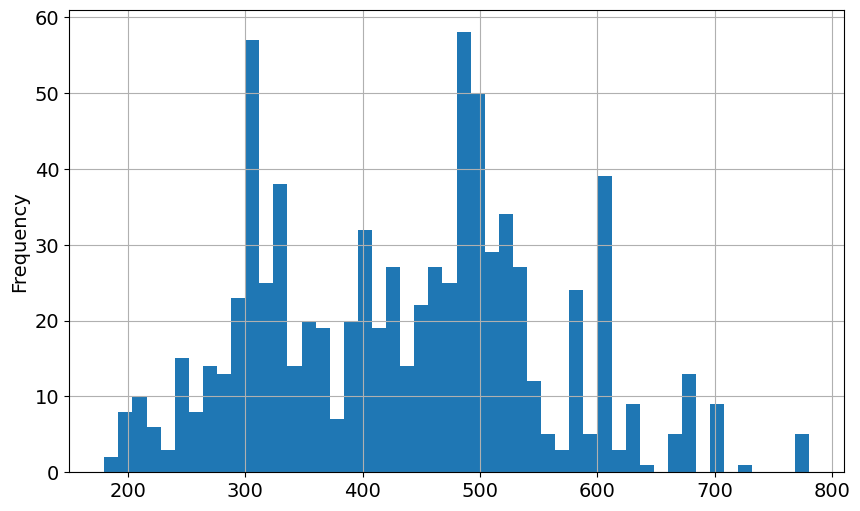

In [6]:
# Отображение гистограммы частот значений признака
# Отобразим данные в 50ти бинах (колонках гистограммы)
df["Total"].plot(kind="hist", bins=50)
plt.grid(True)
plt.show()

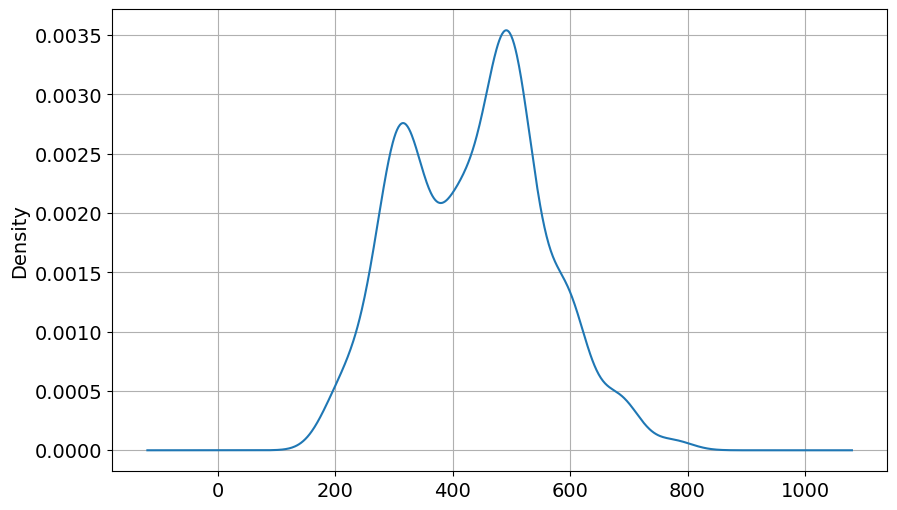

In [7]:
# Отображение данных в виде KDE (Kernel Density Estimation)
# Так называется плотность распределения переменной
df["Total"].plot(kind="kde")
plt.grid(True)
plt.show()

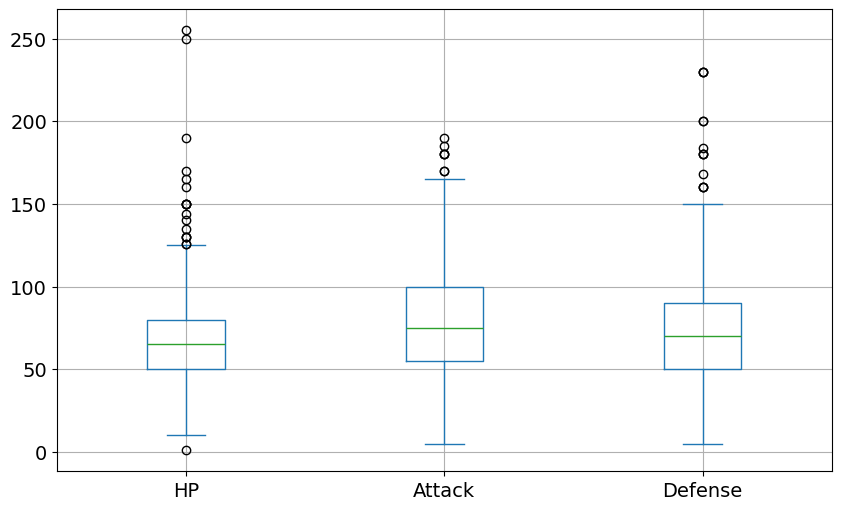

In [8]:
# Отображение трёх признаков в виде "ящиков с усами"
df[["HP", "Attack", "Defense"]].plot(kind="box")
plt.grid(True)
plt.show()

Отображение ящик с усами полезно для обзора численных данных:
- линия внутри ящика - медиана;
- верхняя и нижняя границы ящика - первый и третий квартили;
- границы усов - "наблюдаемый" минимум/максимум;
- точки - статистические выбросы.

> Более детальная информация: https://ru.wikipedia.org/wiki/Ящик_с_усами

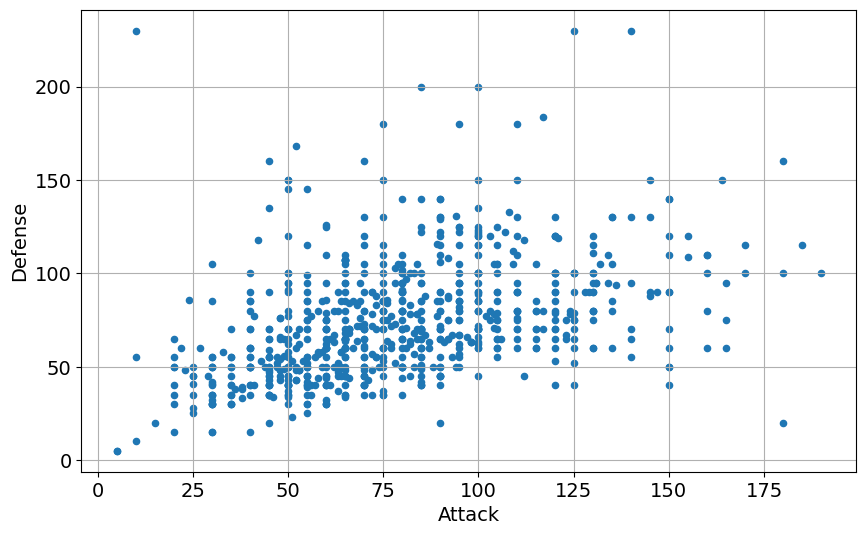

In [9]:
# Отображение точечного графика
# Задаем признаки, значения которых будет отображено по осям
df.plot(kind="scatter", x="Attack", y="Defense")
plt.grid(True)
plt.show()

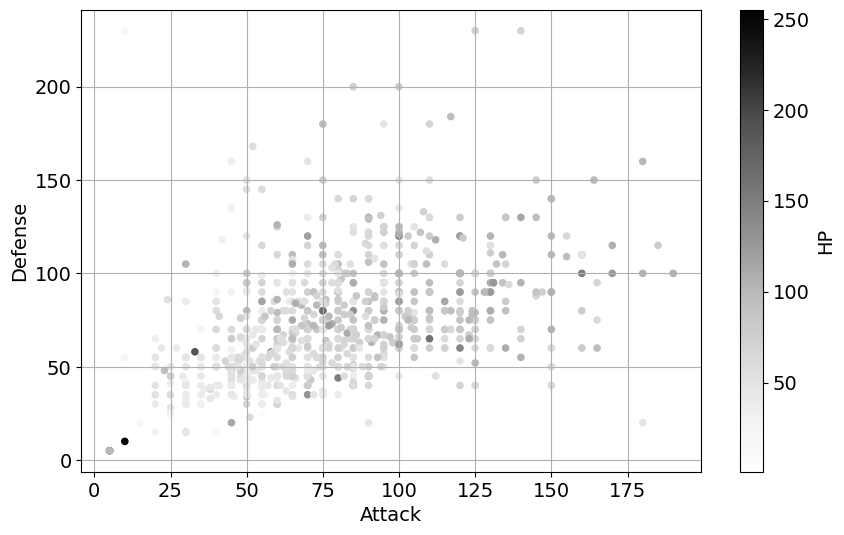

In [10]:
# Также, можно добавить третий признак на точечный график в виде цвета
df.plot(kind="scatter", x="Attack", y="Defense", c="HP")
plt.grid(True)
plt.show()

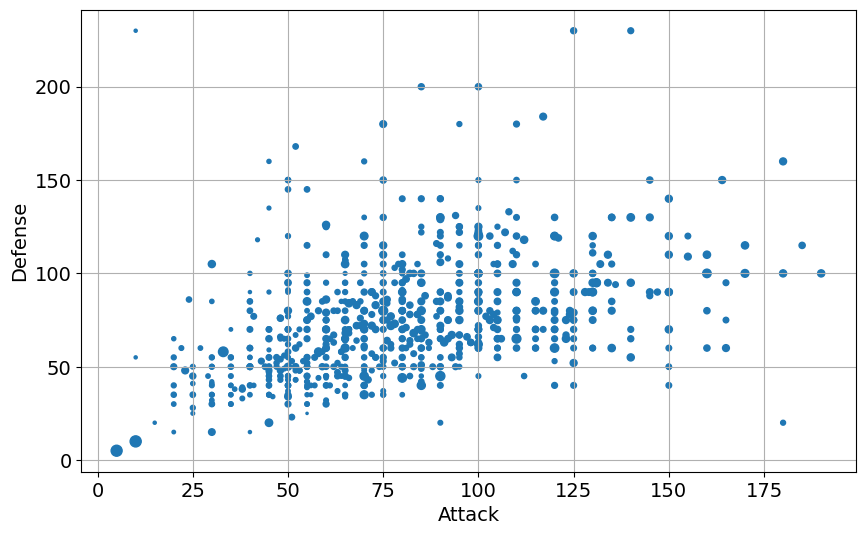

In [11]:
# Или в виде размера
df.plot(kind="scatter", x="Attack", y="Defense", s=df["HP"]/4)
plt.grid(True)
plt.show()

## Первая визуализация с помощью seaborn

Как мы теперь знаем, данные можно отобразить с помощью инструментов matplotlib, pandas (тот же matplotlib, но методами pandas). Последний инструмент (seaborn) позволяет рисовать похожие графики, но в более обощённом виде.

Мы начнём знакомство с анализа по одной переменной, в котором переменные (признаки) рассматриваются по отдельности.


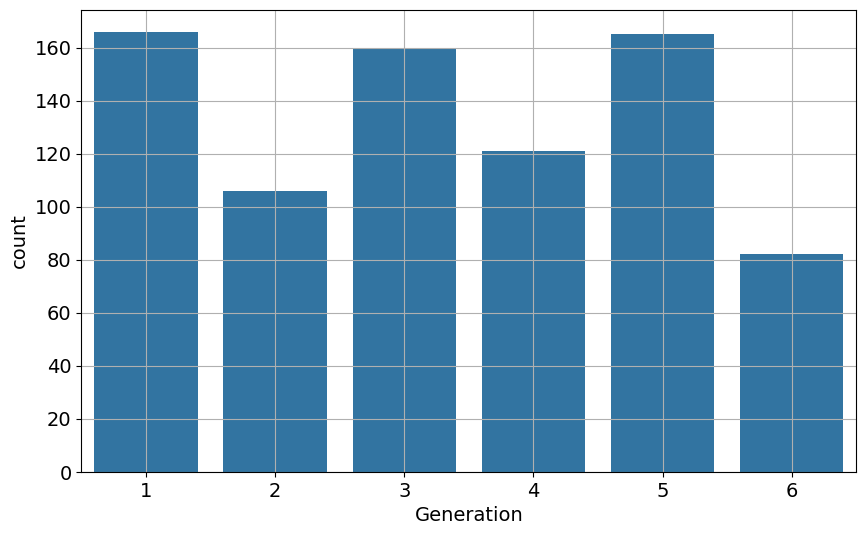

In [12]:
# Первый график - график количества значений
# Такой график отображает количества уникальных значений
# Хорошо подходит для категориальных признаков
sns.countplot(x="Generation", data=df)
plt.grid(True)
plt.show()

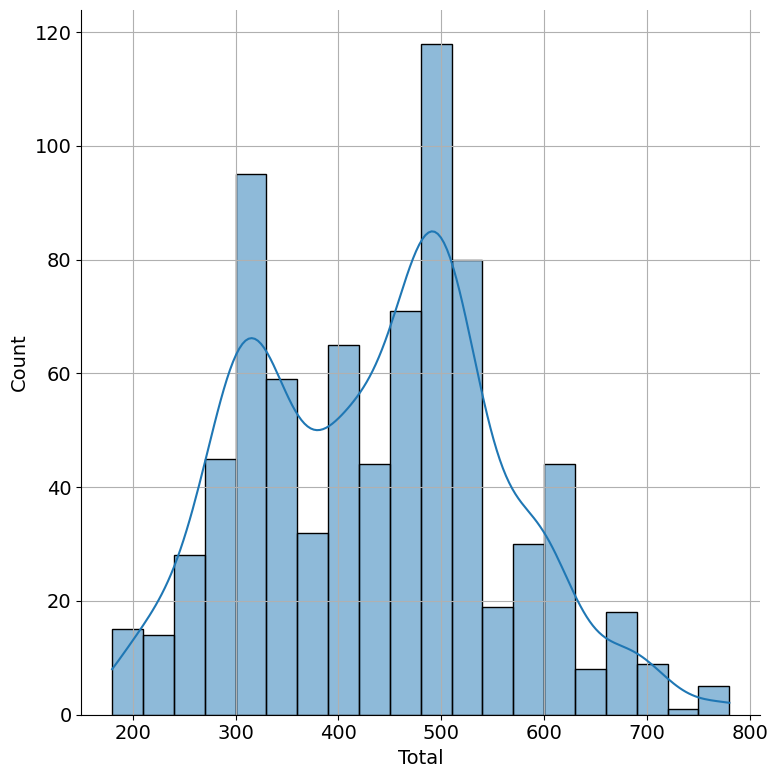

In [13]:
# График простого распределения признака
sns.displot(df["Total"], bins=20, kde=True, height=8)
plt.grid(True)
plt.show()

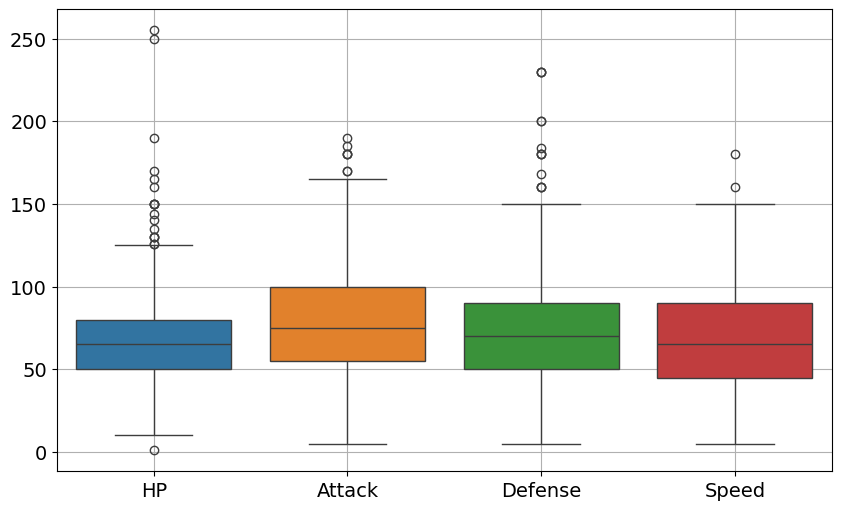

In [14]:
# Отображение графика "ящик с усами"
sns.boxplot(data=df[["HP", "Attack", "Defense", "Speed"]]);
plt.grid(True)
plt.show()

Другой визуализацией распределения является график скрипки, который показывает плотность распределения:

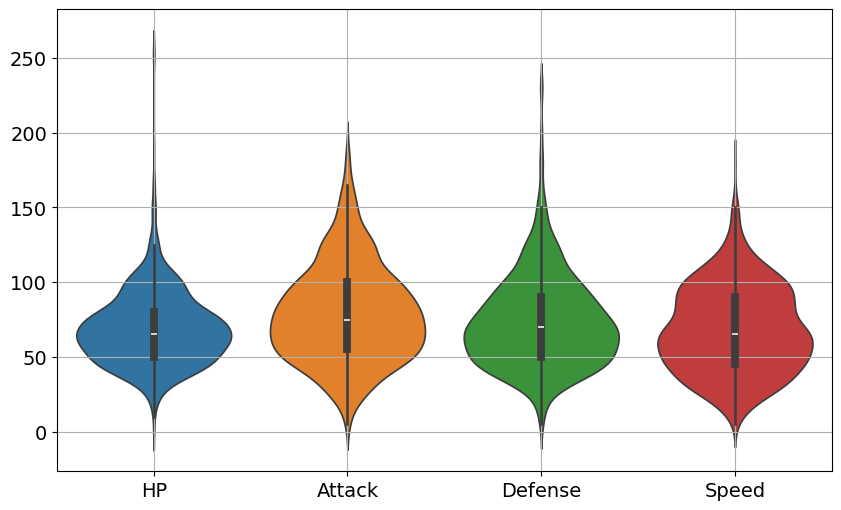

In [15]:
sns.violinplot(data=df[["HP", "Attack", "Defense", "Speed"]])
plt.grid(True)
plt.show()

### Задание - уникальность

Отобразите график количества уникальных значений признака `Type 1`:

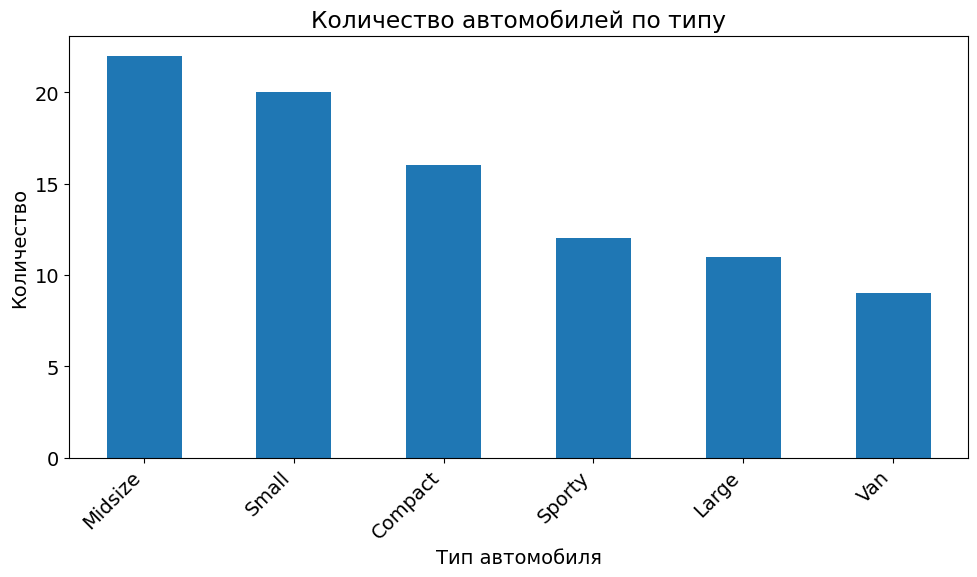

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/datasets/Cars93_miss.csv")

df["Type"].value_counts().plot(kind='bar')
plt.title("Количество автомобилей по типу")
plt.xlabel("Тип автомобиля")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Анализ по нескольким переменным

Анализ по нескольким переменным позволяет оценить не только характеристики конкретных признаков, но и взаимосвязи признаков.

> Обратите внимание, что размещать с помощью зон отображения **все** графики seaborn можно при помощи аргумента `ax` или прямо управлением `plt.subplot()`.

### Задание - ящики и усики

Отобразите график ящика с усами с помощью функции `sns.boxplot()`, отображая один из показателей `HP`, `Attack` или `Defense` от поколения и легендарности.

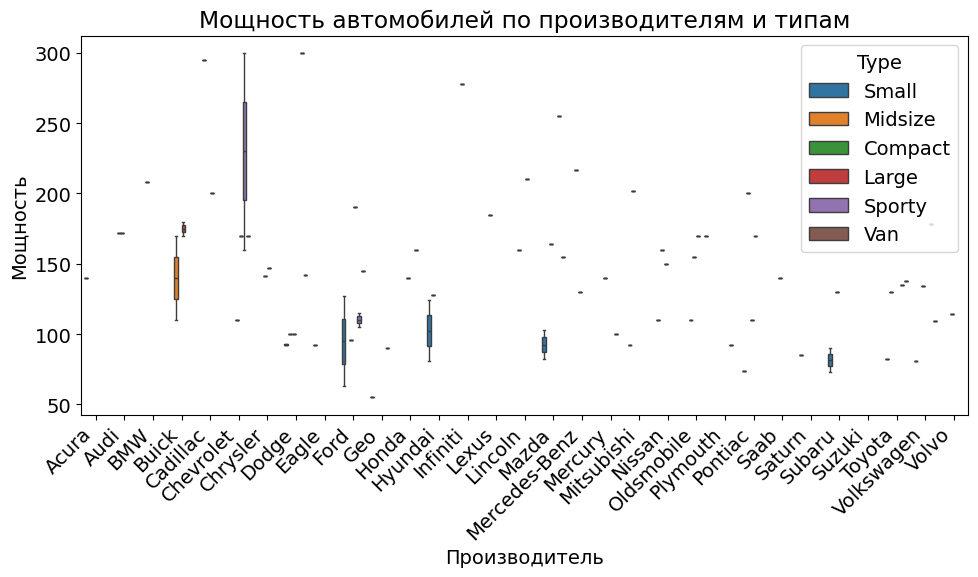

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/datasets/Cars93_miss.csv")


sns.boxplot(x="Manufacturer", y="Horsepower", hue="Type", data=df)

plt.title('Мощность автомобилей по производителям и типам')
plt.xlabel('Производитель')
plt.ylabel('Мощность')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---

Даже простой график скрипки уже показывает распределение данных в зависимости от поколения и легендарности. Как видите, мы воспользовались аргументами `x`, `y`, и `hue`. Последний в графике скрипки подходит для бинарного признака.

Одним из главных графиков при анализе зависимостей численных переменных является матрица корреляции признаков.

После того, как проанализированы показатели корреляции - важно визуально оценить распределение данных.

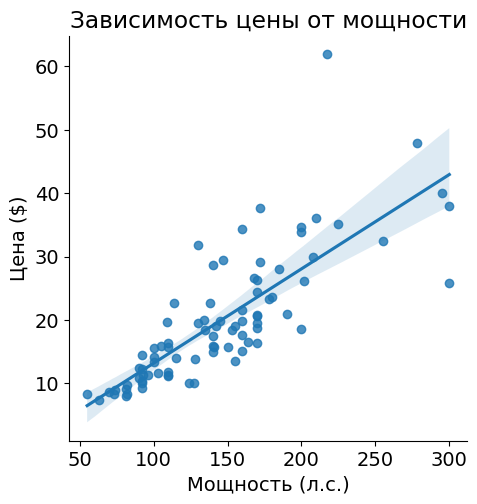

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.lmplot(x="Horsepower", y="Price", data=df, fit_reg=True)

plt.title("Зависимость цены от мощности")
plt.xlabel("Мощность (л.с.)")
plt.ylabel("Цена ($)")
plt.show()



### Задание - точечки

Отобразите точечный график показателя атаки от защиты с разделением цветов по легендарности. Отключите построение прямой регрессии и отобразите разные группы маркерами "x" и "o".

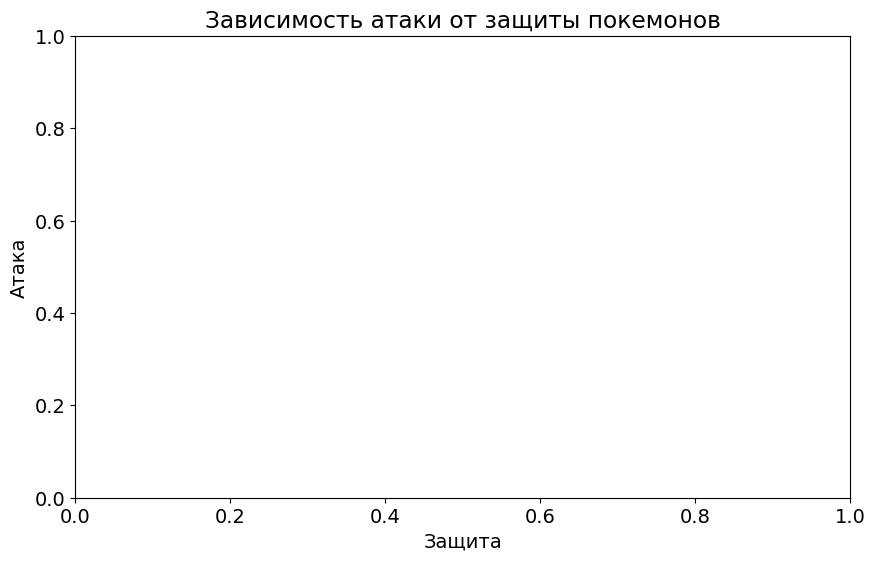

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.title("Зависимость атаки от защиты покемонов")
plt.xlabel("Защита")
plt.ylabel("Атака")
plt.show()


---

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные (предположим, что у вас есть DataFrame с именем "df")
# df = pd.read_csv('your_pokemon_data.csv')

# Создаем jointplot с разделением по цвету

plt.show()


ValueError: Could not interpret value `HP` for `x`. An entry with this name does not appear in `data`.

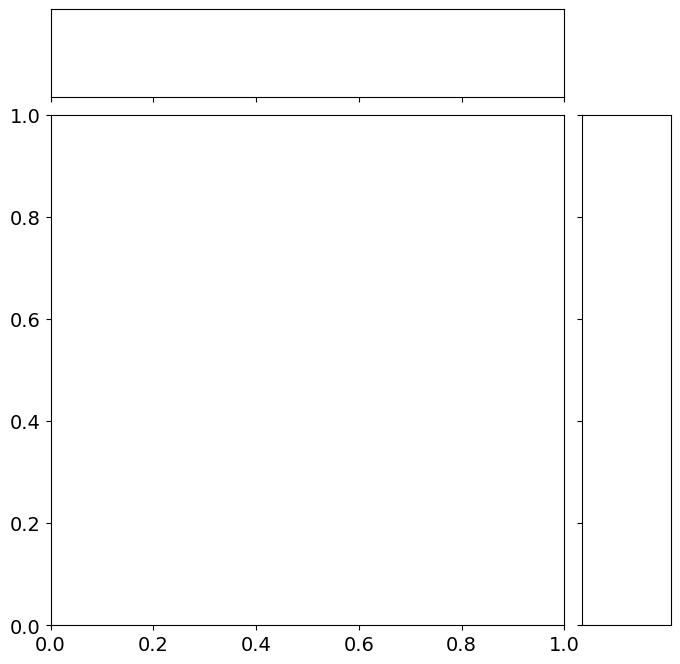

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные (предположим, что у вас есть DataFrame с именем "df")
# df = pd.read_csv('your_pokemon_data.csv')

# Создаем jointplot с отображением в виде шестиугольников
sns.jointplot(x="HP", y="Attack", data=df, kind="hex", height=8)
plt.show()


KeyError: 'HP'

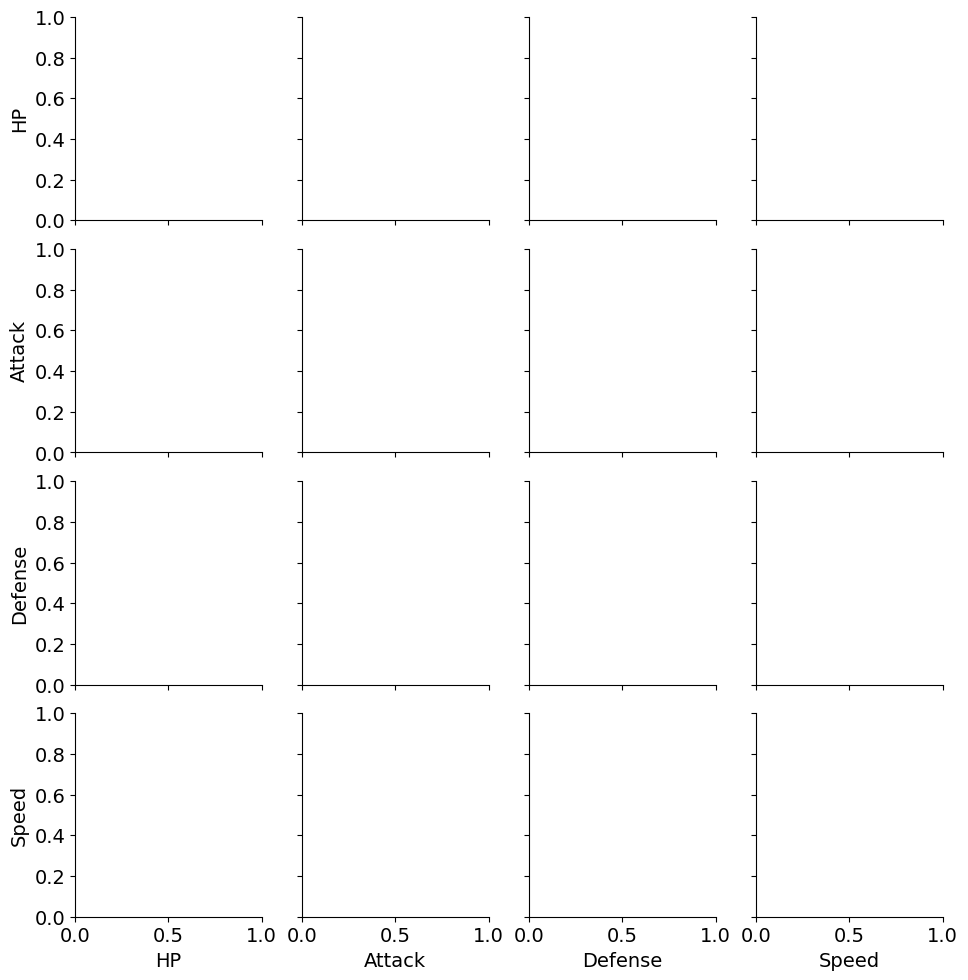

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные (предположим, что у вас есть DataFrame с именем "df")
# df = pd.read_csv('your_pokemon_data.csv')

# Создаем pairplot для выбранных признаков
sns.pairplot(data=df, vars=["HP", "Attack", "Defense", "Speed"])
plt.show()


KeyError: 'Legendary'

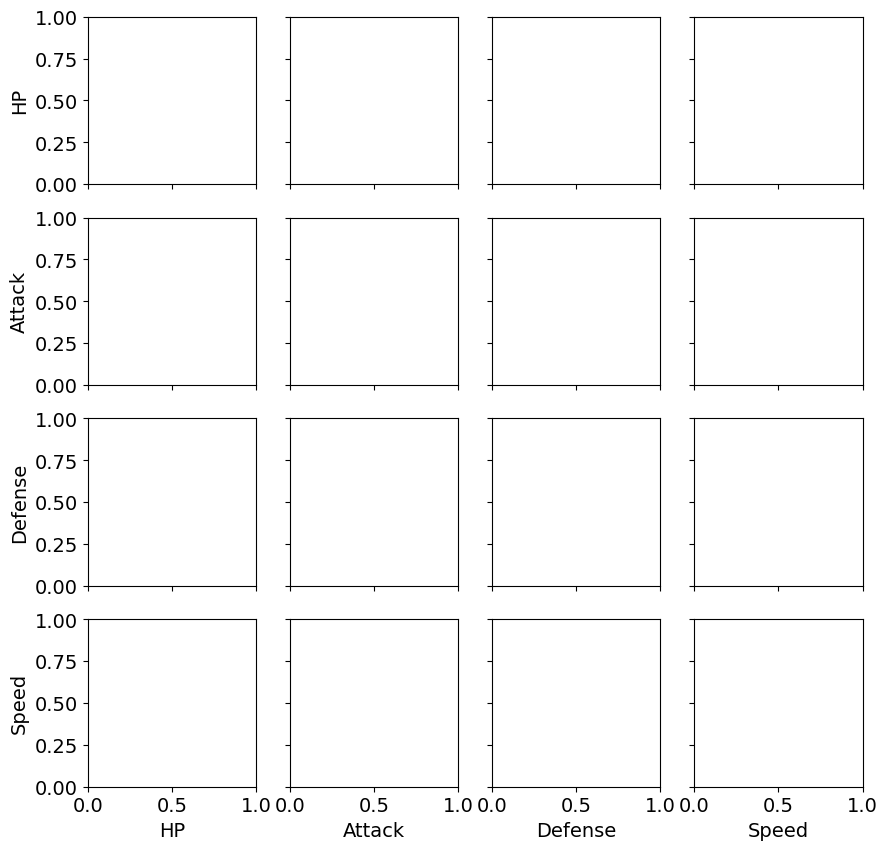

In [56]:
# Аналогично, можно задать отображение групп в виде цветов
sns.pairplot(data=df, vars=["HP", "Attack", "Defense", "Speed"], hue="Legendary")
plt.show()

Последний инструмент для рассмотрения - автоматическое построение графиков в разных зонах в зависимости от групп.

In [57]:
# FacetGrid - класс для построения разметки в зависимости
#   от уникальных значений в данных
g = sns.FacetGrid(df, col="Generation")
# После того, как разметка построена - делаем отображение
#   путем задания типов графиков и самих данных
g = g.map(plt.hist, "Total")
plt.show()

KeyError: 'Generation'

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные (предположим, что у вас есть DataFrame с именем "df")
# df = pd.read_csv('your_pokemon_data.csv')

# Создаем FacetGrid, группируя по поколениям
g = sns.FacetGrid(df, row="Generation", height=3, aspect=2)

# Отображаем точечный график "HP" от "Attack" на каждом графике
g = g.map(plt.scatter, "HP", "Attack")

# Отображаем график
plt.show()


KeyError: 'Generation'

### Задание - анализ сил

Отобразите точечные графики показателей защиты от атаки. Разделите цветами по легендарности. Отобразите графики в ряд по поколениям:

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные (предположим, что у вас есть DataFrame с именем "df")
# df = pd.read_csv('your_pokemon_data.csv')


# Отображаем график
plt.show()


In [64]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,NaN,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


## Заключение

Применение seaborn позволяет упростить работу с визуализацией и интерпретацией данных. Рассмотренные в практике способы отображения не покрывают весь функционал, поэтому для более подробного разбора инструментария по каждому графику на официальном сайте имеется отличная [документация](https://seaborn.pydata.org/api.html) с примерами.